In [1]:
## Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Modelling
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('data/EDA_stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [5]:
## Label Encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['gender']= label_encoder.fit_transform(df['gender']) 
df['race_ethnicity']= label_encoder.fit_transform(df['race_ethnicity']) 
df['parental_level_of_education']= label_encoder.fit_transform(df['parental_level_of_education']) 
df['lunch']= label_encoder.fit_transform(df['lunch']) 
df['test_preparation_course']= label_encoder.fit_transform(df['test_preparation_course']) 

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [7]:
## X and y split
X=df.drop('math_score',axis=1)

In [8]:
y=df['math_score']

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,0,1,1,1,1,72,74
1,0,2,4,1,0,90,88
2,0,1,3,1,1,95,93
3,1,0,0,0,1,57,44
4,1,2,4,1,1,78,75


In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape, X_test.shape

((800, 7), (200, 7))

### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
## Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4474
- Mean Absolute Error: 5.0928
- R2 Score: 0.8156
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3196
- Mean Absolute Error: 4.9831
- R2 Score: 0.8359


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5878
- Mean Absolute Error: 4.4942
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3195
- Mean Absolute Error: 4.1310
- R2 Score: 0.8837


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.1768
- Mean Absolute Error: 5.7588
- R2 Score: 0.7715
-----------------------

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.883803
2,Ridge,0.883713
7,CatBoosting Regressor,0.849097
5,Random Forest Regressor,0.848062
1,Lasso,0.835876
6,XGBRegressor,0.824909
4,Decision Tree,0.736047
3,K-Neighbors Regressor,0.662020


## Linear Regression

In [16]:
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = linear.predict(X_test)

### Plot y_test and y_pred

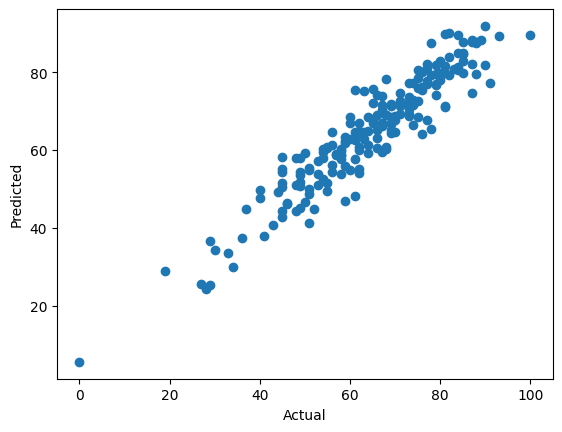

In [18]:
## predictions
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

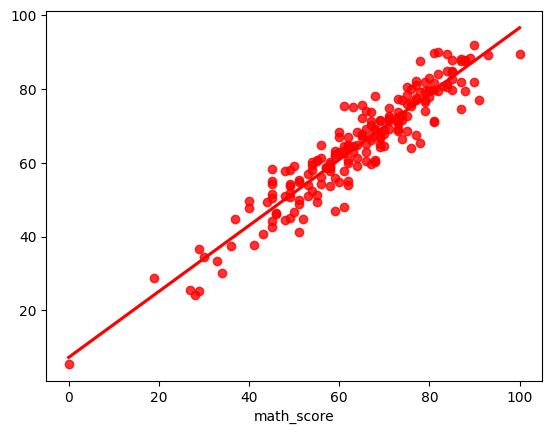

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852
